In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Colaboração: Adriano Santos

# Agrupamento com k-means

In [2]:
# Importação das bibliotecas - Esse código em Python utiliza a biblioteca scikit-learn para realizar um agrupamento de dados com o algoritmo K-Means. Ele importa conjuntos de dados, numpy para manipulação numérica, métricas de matriz de confusão, e a biblioteca matplotlib para visualização. Em essência, ele realiza uma análise de cluster para agrupar pontos de dados em clusters com base em suas características, facilitando a identificação de padrões e estruturas nos dados.

from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Carregamento da base de dados - Neste código, estamos usando a biblioteca scikit-learn para carregar o famoso conjunto de dados "Iris". Em seguida, estamos realizando uma análise simples para contar quantos registros existem em cada classe das flores Iris (Setosa, Versicolor e Virginica). Para fazer isso, utilizamos a função `np.unique` para identificar as classes únicas no conjunto de dados e contar a quantidade de ocorrências de cada uma delas. O resultado é uma lista de valores que representam a quantidade de registros em cada classe.

iris = datasets.load_iris()
unicos, quantidade = np.unique(iris.target, return_counts = True)
unicos

array([0, 1, 2])

In [5]:
quantidade

array([50, 50, 50], dtype=int64)

In [6]:
# Agrupamento com k-means, utilizando 3 clusters (de acordo com a base de dados) - Nesse código, estamos realizando um agrupamento de dados usando o algoritmo K-means com o objetivo de criar 3 clusters com base nos dados da flor Iris. Primeiro, inicializamos o modelo K-means com 3 clusters e, em seguida, ajustamos o modelo aos dados da flor Iris usando o método 'fit'. Esse processo agrupa os dados em três grupos distintos, com base em suas características, permitindo uma análise mais fácil e identificação de padrões nos dados.

cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
# Visualização dos três centroides - Esse código em Python mostra os três centroides de um agrupamento de dados. Os centroides são pontos que representam o centro de cada grupo. A variável "centroides" armazena esses valores, que podem ser usados para análises posteriores. É uma parte importante na clusterização de dados, auxiliando na compreensão das tendências e características dos grupos formados.

centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
# Visualização dos grupos que cada registro foi associado - O código exibe a atribuição de cada registro a um grupo específico. Ele armazena essas atribuições na variável 'previsoes' e, em seguida, a imprime. Isso é útil em tarefas de clusterização, onde os registros são agrupados com base em características similares, permitindo uma análise mais detalhada dos grupos a que pertencem.

previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
# Contagem dos registros por classe - Esse código realiza a contagem de registros por classe em um conjunto de previsões. Ele utiliza a biblioteca NumPy para encontrar os valores únicos nas previsões e calcular a quantidade de ocorrências de cada valor único, armazenando essas informações nas variáveis 'unicos2' e 'quantidade2'. Isso é útil para analisar a distribuição das classes em um conjunto de dados classificado.

unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
unicos2

array([0, 1, 2])

In [11]:
quantidade2

array([62, 50, 38], dtype=int64)

In [13]:
# Geração da matriz de contingência para comparar os grupos com a base de dados - Este código realiza a geração de uma matriz de contingência para comparar os grupos previstos com a base de dados real. Ele utiliza a função `confusion_matrix` para calcular os resultados, armazenando o resultado na variável `resultados`. Essa matriz é útil para avaliar a precisão de um modelo de classificação, mostrando as previsões corretas e incorretas para cada classe na base de dados.

resultados = confusion_matrix(iris.target, previsoes)
resultados


array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

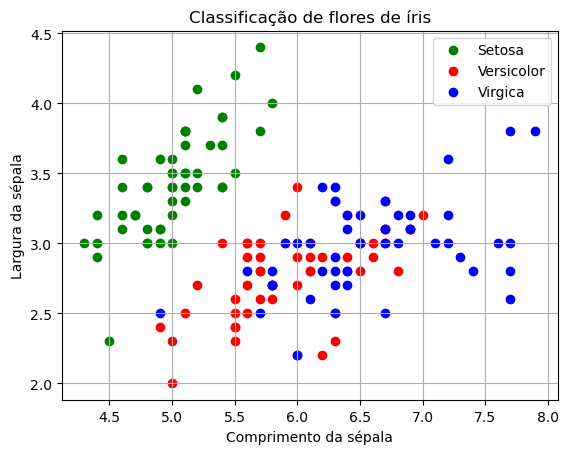

In [33]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2), onde foram usados somente as colunas 0 e 1 da base de dados original para termos 2 dimensões - Este código Python cria um gráfico de dispersão para visualizar a classificação de flores de íris com base em clusters (previsões) gerados. O gráfico mostra duas dimensões representadas pelo comprimento e largura da sépala. Cada cluster é representado por pontos coloridos: verde para 'Setosa', vermelho para 'Versicolor' e azul para 'Virginica'. As etiquetas e cores ajudam a identificar diferentes grupos de flores de íris com base nas características da sépala. As instruções definem o título, rótulos dos eixos e a legenda para facilitar a interpretação do gráfico.

plt.title('Classificação de flores de íris')
plt.xlabel('Comprimento da sépala')
plt.ylabel('Largura da sépala')
plt.grid()

plt.scatter(
    iris.data[previsoes == 0, 0], 
    iris.data[previsoes == 0, 1], 
    c = 'green', label = 'Setosa'
)

plt.scatter(
    iris.data[previsoes == 1, 0], 
    iris.data[previsoes == 1, 1], 
    c = 'red', label = 'Versicolor'
)

plt.scatter(
    iris.data[previsoes == 2, 0], 
    iris.data[previsoes == 2, 1], 
    c = 'blue', label = 'Virgica'
)

plt.legend()

- Este é um conjunto de dados famoso que muitas vezes é usado em ciência de dados e aprendizado de máquina para classificação. 
- A imagem acima mostra um gráfico de dispersão que classifica flores de íris. 
- O gráfico tem três cores: verde, vermelho e azul. 
- O eixo x é rotulado como "Comprimento da sépala" e o eixo y é rotulado como "Largura da sépala". 
- O título do gráfico é "Classificação de flores de íris". 
- A legenda mostra que o verde representa "Setosa", o vermelho representa "Versicolor" e o azul representa "Virgica". 
- Cada ponto no gráfico representa uma flor de íris individual, com o comprimento da sépala no eixo x e a largura da sépala no eixo y.
-  É interessante notar como cada tipo de íris parece ter uma faixa distinta para essas duas características, o que torna possível classificá-las com base apenas nessas duas características.
- Isso é um exemplo clássico de como a visualização de dados pode nos ajudar a entender as características distintas de diferentes categorias em um conjunto de dados.

![Alt text](image-2.png)